# **Hotel Booking Demand**

## **Business Problem Understanding**

### **Context**

Industri perhotelan merupakan salah satu sektor penting dalam pariwisata, dimana hotel tidak hanya menyediakan tempat menginap, tetapi juga berperan dalam kenyamanan dan pengalaman tamu. Pada era digital ini, semakin banyak pelanggan yang melakukan pemesanan kamar secara *online* melalui platform seperti website hotel, *Online Travel Agent*, atau aplikasi mobile. Kemudahan ini membuat hotel dapat menjangkau pasar yang lebih luas, tetapi juga menimbulkan tantangan baru yaitu meningkatnya tingkat pembatalan. Pemesanan online yang fleksibel dan opsi pembatalan gratis membuat banyak tamu memesan tanpa komitmen penuh, sehingga kamar sering menjadi kosong secara mendadak dan pendapatan hotel menjadi tidak pasti.

Sebuah hotel di Portugal sering mengalami pembatalan pemesanan secara mendadak oleh pelanggan. Hal ini menyebabkan kamar kosong secara mendadak, pendapatan berkurang, dan perencanaan operasional menjadi sulit. Pihak hotel ingin mengetahui pelanggan mana yang benar-benar akan menginap dan pelanggan mana yang akan membatalkan pemesanan, sehingga pihak hotel dapat mengambil tindakan strategis, seperti menyesuaikan harga, mengatur kembali alokasi kamar, atau menerapkan kebijakan deposit yang lebih tepat pada segmen pelanggan tertentu.

### **Problem Statement**

Salah satu tantangan terbesar yang dihadapi pihak hotel adalah tingginya tingkat pembatalan pemesanan, yang menyebabkan kamar menjadi kosong, pendapatan menurun, dan kesulitan dalam perencanaan operasional. Pembatalan yang tinggi juga berdampak langsung pada kerugian finansial hotel. **Oleh karena itu, pihak hotel ingin mengetahui pelanggan yang berpotensi besar akan membatalkan pemesanan agar dapat mengurangi kerugian dan mengoptimalkan efisiensi operasional hotel**. 

### **Goals**

Berdasarkan permasalahan tersebut, pihak hotel perlu memiliki **sistem prediksi yang dapat memprediksi apakah pelanggan berpotensi membatalkan pemesanan atau tidak**. Sistem prediksi yang akurat dapat mengurangi kerugian akibat pembatalan, meningkatkan tingkat okupansi kamar, dan mengoptimalkan pendapatan hotel. Dengan kata lain, semakin tepat hotel dalam memprediksi pembatalan, semakin efisien operasionalnya dan semakin optimal strategi *revenue management* yang diterapkan.

### **Analytic Approach**

Jadi, yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan antara pelanggan yang akan membatalkan pemesanan dan tidak. Kemudian, kita akan membangun model klasifikasi yang akan membantu pihak hotel untuk dapat memprediksi probabilitas seorang pelanggan akan membatalkan pemesanan atau tidak.

### **Metric Evaluation**

| Actual        | Prediction (N)        | Prediction (P)       |
|---------------|-----------------------|----------------------|
| Negative (N)  | True Negative (TN)    | False Positive (FP)  |
| Positive (P)  | False Negative (FN)   | True Positive (TP)   |

Keterangan:
- Negative (N) = Kelas negatif (Tidak Dibatalkan)
- Positive (P) = Kelas positif (Dibatalkan)
- True Negative (TN) = Model memprediksi pelanggan tidak membatalkan pemesanan, dan hasil sebenarnya pelanggan memang tidak membatalkan pemesanan
- True Positive (TP) = Model memprediksi pelanggan akan membatalkan pemesanan, dan hasil sebenarnya pelanggan memang membatalkan pemesanan
- False Positive (FP) = Model memprediksi pelanggan akan membatalkan pemesanan, namun sebenarnya pelanggan tidak membatalkan pemesanan
- False Negative (FN) = Model memprediksi pelanggan tidak membatalkan pemesanan, namun sebenarnya pelanggan membatalkan pemesanan


Sebelum menentukan metrik evaluasi yang akan digunakan, kita akan melihat konsekuensi yang ditimbulkan pada masing-masing error/kesalahan prediksi.
| Kesalahan             | Konsekuensi |
|-----------------------|-------------|
| False Positive (FP)   | Potensi kehilangan pelanggan atau merusak pengalaman tamu. |
| False Negative (FN)   | Mengalami kerugian secara finansial dan operasional hotel menjadi terganggu. |

Berdasarkan konsekuensi dari masing-masing kesalahan, **False Negative memiliki konsekuensi finansial yang paling signifikan** karena pembatalan pemesanan menyebabkan hilangnya pendapatan dan mengurangi efisiensi operasional hotel. Oleh karena itu, akan dilakukan pembuatan model yang dapat meminimalkan kerugian hotel akibat pembatalan pemesanan dengan memprediksi sebanyak mungkin kelas positif yang benar dan meminimalkan prediksi False Negative. Jadi, metrik evaluasi yang akan digunakan adalah **Recall**.

## **Data Understanding**

Dataset yang digunakan berisi informasi pemesanan kamar dari sebuah hotel yang berlokasi di Portugal. Setiap baris data merepresentasikan informasi mengenai reservasi kamar dari masing-masing pelanggan. Semua informasi yang dapat mengidentifikasi identitas pribadi tamu telah dihapus.

**Features Information**
| Feature                           | Data Type   | Deskripsi |
|-----------------------------------|-------------|-----------|
| country                           | Object      | Kode negara asal pelanggan (ISO 3166-3). |
| market_segment                    | Object      | Jenis segmen pasar pemesanan. Terdapat 8 kategori pasar antara lain: <br> 1. Direct = Pelanggan memesan langsung ke hotel <br> 2. Corporate = Pemesanan dilakukan oleh perusahaan <br> 3. Online TA = Pemesanan melalui Online Travel Agent <br> 4. Offline TA/TO = Pemesanan melalui Travel Agent atau Tour Operator secara offline <br> 5. Groups = Pemesanan untuk group atau kelompok <br> 6. Complementary = Pelanggan tidak perlu membayar kamar atau gratis <br> 7. Aviation = Pemesanan dari maskapai untuk crew (pilot, pramugari) atau penumpang yang terkena delay/pembatalan penerbangan <br> 8. Undefined = Segmen pasar tidak tercatat atau tidak dapat diklasifikasikan |
| previous_cancellations            | Integer     | Jumlah pemesanan sebelumnya yang pernah dibatalkan oleh pelanggan sebelum pemesanan saat ini. |
| booking_changes                   | Integer     | Jumlah perubahan atau pengeditan pada pemesanan sejak pertama kali dicatat di sistem hingga saat check-in atau pembatalan. |
| deposit_type                      | Object      | Indikasi apakah pelanggan telah melakukan deposit untuk menjamin pemesanan. Terdapat 3 kategori deposit antara lain: <br> 1. No Deposit (Tanpa deposit) <br> 2. Non Refund (Deposit tidak dapat dikembalikan) <br> 3. Refundable (Deposit dapat dikembalikan) |
| days_in_waiting_list              | Integer     | Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan. |
| customer_type                     | Object      | Tipe pelanggan berdasarkan karakteristik pemesanan. Terdapat 4 tipe pelanggan antara lain: <br> 1. Transient = Pelanggan individu yang memesan sendiri <br> 2. Transient-Party = Pelanggan individu, namun datang bersama kelompok kecil (teman atau keluarga) <br> 3. Contract = Pemesanan dari kontrak jangka panjang antara hotel dan sebuah perusahaan/agen <br> 4. Group = Pemesanan untuk kelompok besar yang diorganisir sebagai group booking |
| reserved_room_type                | Object      | Kode tipe kamar yang dipesan. Kode digunakan untuk menjaga anonimitas. |
| required_car_parking_space        | Integer     | Jumlah ruang parkir mobil yang diminta oleh pelanggan. |
| total_of_special_request          | Integer     | Jumlah permintaan khusus yang diajukan pelanggan. |
| is_canceled                       | Integer     | Nilai yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak dibatalkan (0). |

In [ ]:
# Impor library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mengimpor dataset dan menampilkan 5 baris teratas

df = pd.read_csv('data_hotel_booking_demand.csv')
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [3]:
# Melihat informasi umun dari data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


## **Data Cleaning**

Sebelum melakukan analisis, perlu dilakukan pengecekan dan *cleaning* pada dataset terlebih dahulu. Tujuan dari proses ini adalah untuk mendeteksi anomali atau kesalahan pada dataset seperti *missing value*, *duplicate data*, *outlier*, dan fitur yang tidak relevan dengan tujuan analisis. Setiap anomali atau kesalahan pada dataset nantinya akan dilakukan penanganan untuk mendapatkan hasil analisis yang sesuai dan akurat.

In [3]:
# Cek info lebih detail untuk setiap fitur

listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['Features', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,Features,dataType,null,nullPercentage,unique,uniqueSample
0,country,object,351,0.42,162,"[KWT, GLP]"
1,market_segment,object,0,0.00,8,"[Undefined, Aviation]"
2,previous_cancellations,int64,0,0.00,15,"[11, 0]"
3,booking_changes,int64,0,0.00,19,"[16, 7]"
4,deposit_type,object,0,0.00,3,"[Non Refund, Refundable]"
5,days_in_waiting_list,int64,0,0.00,115,"[162, 23]"
6,customer_type,object,0,0.00,4,"[Transient, Transient-Party]"
7,reserved_room_type,object,0,0.00,10,"[C, G]"
8,required_car_parking_spaces,int64,0,0.00,5,"[1, 0]"
9,total_of_special_requests,int64,0,0.00,6,"[2, 3]"


Dari info dataset tersebut terlihat bahwa fitur atau kolom `country` memiliki *missing value* sebanyak 351 baris atau sekitar 0.42% sehingga perlu dilakukan penanganan terhadap *missing value* tersebut.

### **Missing Value**

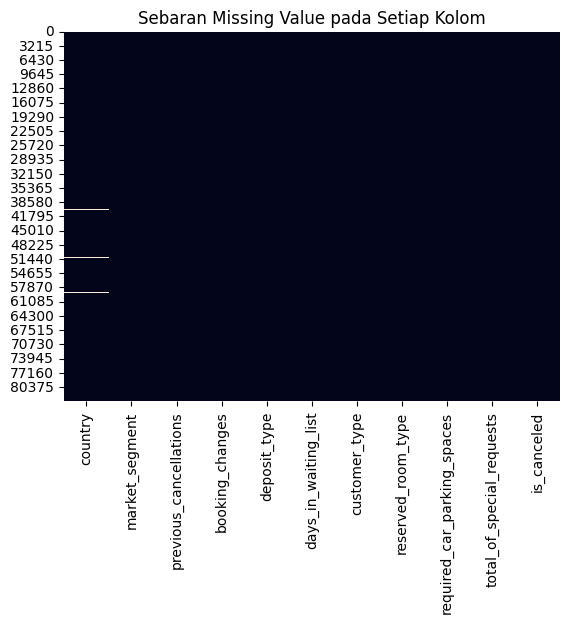

In [4]:
# Sebaran missing value di dalam data

sns.heatmap(df.isna(), cbar=False)
plt.title('Sebaran Missing Value pada Setiap Kolom', size=12)

plt.show()

Berdasarkan grafik di atas, terlihat bahwa *missing value* pada kolom `country` memiliki pola persebaran yang acak. Penanganan *missing value* pada kolom tersebut akan dilakukan dengan menghapus baris yang memiliki *missing value* karena persentase *missing value* yang tergolong sangat rendah sekitar 0.42%.

In [5]:
# Menghapus missing value pada kolom country

df.dropna(inplace=True)

In [6]:
# Cek kembali missing value pada data

df.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

Berdasarkan pengecekan tersebut terlihat bahwa sudah tidak ada lagi *missing value* pada dataset.

### **Duplicated Data**

Kemudian melakukan pengecekan terhadap data apakah terdapat data yang duplikat atau tidak agar hasil modeling nantinya menjadi akurat dan tidak bias.

In [7]:
# Cek duplicate data

print(f'Jumlah baris yang duplikat: {df.duplicated().sum()} atau sekitar {df.duplicated().sum()/len(df)*100:.2f}%')

Jumlah baris yang duplikat: 73138 atau sekitar 87.88%


Berdasarkan pengecekan tersebut terlihat bahwa terdapat sekitar 73.000 data yang duplikat atau sekitar 88%. Oleh karena itu, akan dilakukan penghapusan terhadap data yang duplikat tersebut dan hanya menyimpan 1 data saja dari beberapa data yang duplikat.

In [8]:
# Menghapus baris yang duplikat dan hanya menyimpan baris pertama saja

df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

np.int64(0)

Terihat bahwa sudah tidak ada lagi data yang duplikat pada dataset.

### **Inconsistent Data and Outlier**

Selanjutnya, melakukan pengecekan pada data apakah terdapat nilai-nilai yang tidak masuk akal atau *outlier* pada setiap fitur. Pengecekan dilakukan dengan melihat statistik deskriptif dari data.

In [9]:
# Melihat statistik deskriptif dari data

display(df.describe(), df.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000
mean,0.088953,0.798195,3.601944,0.165411,0.941194,0.237604
std,0.832329,1.297329,22.322779,0.392594,1.038012,0.425636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,10084,10084,10084,10084,10084
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,1993,4924,9843,6813,4562


Berdasarkan statistik deskriptif data tersebut terlihat bahwa tidak terdapat nilai yang tidak masuk akal pada setiap fitur, meskipun pada fitur atau kolom `days_in_waiting_list` memiliki range data yang cukup besar yaitu 0-391 hari. Fitur tersebut mengindikasikan terdapat nilai yang *outlier* sehingga perlu dilakukan pengecekan menggunakan boxplot.

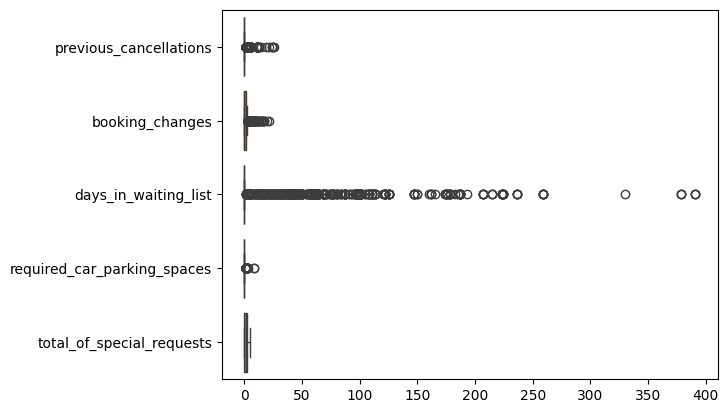

In [10]:
# Boxplot setiap fitur numerik

num_cols = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

sns.boxplot(df[num_cols], orient='h')

plt.show()

Berdasarkan boxplot tersebut, terlihat bahwa fitur `days_in_waiting_list` memiliki sangat banyak *outliers* sehingga perlu dilakukan penanganan terhadap *outlier* tersebut. Persebaran *outlier* pada fitur tersebut mulai jarang terjadi ketika data bernilai lebih dari 250, yang artinya jumlah hari pemesanan berada dalam daftar tunggu lebih dari 250 hari merupakan kejadian yang jarang terjadi sehingga akan dihapus dari dataset.

In [11]:
# Menghapus baris yang memiliki nilai days_in_waiting_list > 250

df.drop(df[df['days_in_waiting_list'] > 250].index, inplace = True)

## **Data yang Sudah Bersih**

In [19]:
# Cek kembali info setiap fitur

listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['Features', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'],
                     data=listItem)

print(f'Jumlah baris dan kolom dataset : {df.shape}')
df_desc

Jumlah baris dan kolom dataset : (10071, 11)


,Features,dataType,null,nullPercentage,unique,uniqueSample
0,country,object,0,0.0,162,"[VNM, SGP]"
1,market_segment,object,0,0.0,8,"[Online TA, Undefined]"
2,previous_cancellations,int64,0,0.0,15,"[1, 0]"
3,booking_changes,int64,0,0.0,19,"[1, 7]"
4,deposit_type,object,0,0.0,3,"[Refundable, No Deposit]"
5,days_in_waiting_list,int64,0,0.0,111,"[207, 87]"
6,customer_type,object,0,0.0,4,"[Transient-Party, Contract]"
7,reserved_room_type,object,0,0.0,10,"[H, F]"
8,required_car_parking_spaces,int64,0,0.0,5,"[8, 1]"
9,total_of_special_requests,int64,0,0.0,6,"[2, 3]"


Setelah dilakukan *cleaning data*, data yang sebelumnya memiliki 83.573 baris menjadi 10.071 baris dan 11 kolom. Terdapat sekitar 73.500 baris atau sekitar 88% data yang kosong dan duplikat sudah dihapus dari dataset.

## **Eksploratory Data Analysis**

### **Proporsi Jumlah Pemesanan Dibatalkan dan Tidak Dibatalkan**

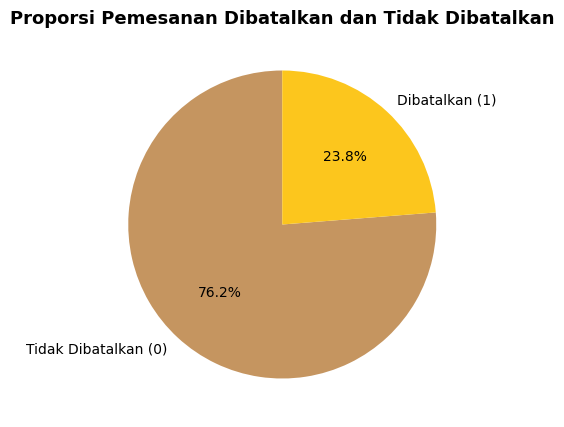

In [65]:
# Pie chart jumlah pemesanan yang dibatalkan vs tidak

cancel = df['is_canceled'].value_counts().reset_index()
cancel['is_canceled'] = np.where(cancel['is_canceled'] == 0, 'Tidak Dibatalkan (0)', 'Dibatalkan (1)')

plt.figure(figsize=(5,5))
plt.pie(x=cancel['count'], labels=cancel['is_canceled'], colors=['#C59560', '#FCC61D'], autopct='%.1f%%', startangle=90)
plt.title('Proporsi Pemesanan Dibatalkan dan Tidak Dibatalkan',  size=13, weight='bold')

plt.show()

Berdasarkan grafik pie chart tersebut, terlihat bahwa mayoritas pemesanan hotel tidak dibatalkan (76%), sementara pembatalan pemesanan mencakup 24% dari total pemesanan. Grafik tersebut juga menunjukkan bahwa terdapat ketidakseimbangan kelas antara pemesanan yang dibatalkan dan tidak dibatalkan.

### **Distribusi Negara**

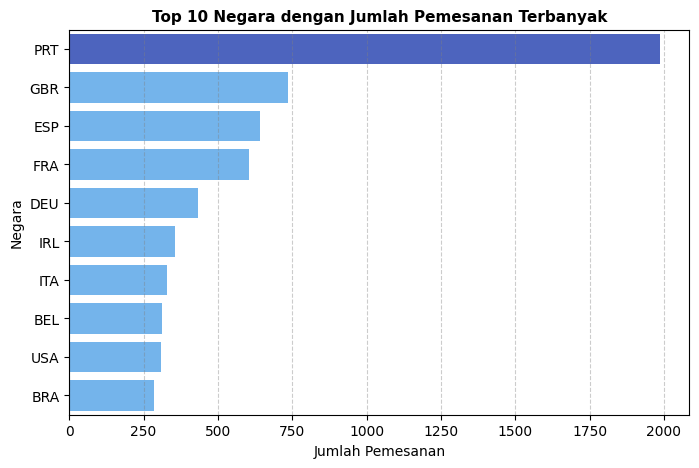

In [21]:
# Barplot 10 negara dengan jumlah pemesanan terbanyak

top_country = df['country'].value_counts().head(10).reset_index()
 
bar_colors = ['#3A59D1'] + ['#60B5FF'] * 9

plt.figure(figsize=(8,5))
sns.barplot(y=top_country['country'], x=top_country['count'], palette=bar_colors)
plt.title('Top 10 Negara dengan Jumlah Pemesanan Terbanyak', size=11, weight='bold')
plt.xlabel('Jumlah Pemesanan')
plt.ylabel('Negara')
plt.grid(axis='x', linestyle='--', alpha=0.4, color='gray')

plt.show()

Grafik barplot tersebut menunjukkan 10 negara dengan jumlah pemesanan kamar hotel terbanyak. Mayoritas pelanggan yang memesan kamar hotel berasal dari negara Portugal (PRT), yang artinya pelanggan dari hotel tersebut lebih banyak berasal dari dalam negeri dibandingkan luar negeri.

### **Segmen Pasar**

In [14]:
# Persentase segmen pasar

market = (df['market_segment'].value_counts(normalize=True) * 100).round(2).reset_index()
market.columns = ['market_segment', 'percentage']
market

,market_segment,percentage
0,Online TA,48.89
1,Direct,20.64
2,Offline TA/TO,14.59
3,Groups,8.26
4,Corporate,5.01
5,Complementary,1.79
6,Aviation,0.80
7,Undefined,0.01


In [17]:
# Persentase pembatalan berdasarkan segmen pasar

segmen_cancel = pd.crosstab(df['market_segment'], df['is_canceled'], normalize='index') * 100
segmen_cancel.round(2).sort_values(by=1, ascending=False)

is_canceled,0,1
market_segment,,
Undefined,0.00,100.00
Online TA,68.85,31.15
Aviation,79.01,20.99
Direct,81.67,18.33
Groups,82.57,17.43
Complementary,84.44,15.56
Offline TA/TO,85.30,14.70
Corporate,86.14,13.86


Berdasarkan tabel tersebut, terlihat bahwa mayoritas pelanggan memesan melalui *Online Travel Agent* dengan persentase sekitar 49% dari total pelanggan. Kemudian, persentase pembatalan paling tinggi terjadi pada kelompok pelanggan Undefined sebesar 100%, namun pelanggan yang termasuk dalam kelompok tersebut hanya ada 1 orang sehingga tidak dapat dikatakan bahwa kelompok pelanggan tersebut selalu melakukan pembatalan pemesanan. Persentase pembatalan tertinggi kedua terjadi pada kelompok pelanggan *Online Travel Agent* dengan persentase sebesar 31%, artinya pelanggan yang termasuk dalam kelompok *Online Travel Agent* lebih sering melakukan pembatalan pemesanan.

### **Tipe Pelanggan**

In [25]:
# Persentase tipe pelanggan

customer = (df['customer_type'].value_counts(normalize=True) * 100).round(2).reset_index()
customer.columns = ['customer_type', 'percentage']
customer

,customer_type,percentage
0,Transient,67.62
1,Transient-Party,25.21
2,Contract,4.78
3,Group,2.39


In [26]:
# Persentase pembatalan berdasarkan tipe pelanggan

customer_cancel = pd.crosstab(df['customer_type'], df['is_canceled'], normalize='index') * 100
customer_cancel.round(2).sort_values(by=1, ascending=False)

is_canceled,0,1
customer_type,,
Transient,71.10,28.90
Transient-Party,86.57,13.43
Contract,86.90,13.10
Group,91.70,8.30


Berdasarkan kedua tabel tersebut, terlihat bahwa tipe pelanggan Transient dan Transient-Party merupakan dua tipe pelanggan yang paling mendominasi dalam pemesanan kamar dengan persentase Transient sekitar 68% dari total pelanggan dan Transient-Party sekitar 25%. Kemudian, tipe pelanggan Transient juga merupakan tipe pelanggan dengan persentase pembatalan paling tinggi sekitar 29% dan dari tabel persentase pembatalan terlihat bahwa tipe pelanggan tidak mempengaruhi tinggi rendahnya persentase pembatalan, karena semakin banyak jumlah pelanggan dari tipe tertentu maka semakin tinggi persentase pembatalannya.

### **Tipe Kamar**

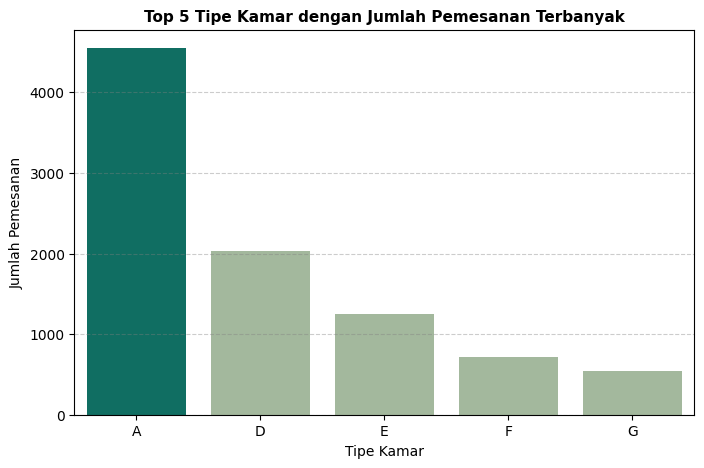

In [27]:
# Barplot 5 tipe kamar dengan jumlah pemesanan terbanyak

top_room = df['reserved_room_type'].value_counts().head(5).reset_index()
 
bar_colors = ['#007E6E'] + ['#A1BC98'] * 4

plt.figure(figsize=(8,5))
sns.barplot(x=top_room['reserved_room_type'], y=top_room['count'], palette=bar_colors)
plt.title('Top 5 Tipe Kamar dengan Jumlah Pemesanan Terbanyak', size=11, weight='bold')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Pemesanan')
plt.grid(axis='y', linestyle='--', alpha=0.4, color='gray')

plt.show()

In [28]:
# Persentase jumlah pemesanan setiap tipe kamar berdasarkan tipe pelanggan

customer_room = pd.crosstab(df['customer_type'], df['reserved_room_type'], normalize='index') * 100
customer_room.round(2).sort_values(by='A', ascending=False)

reserved_room_type,A,B,C,D,E,F,G,H,L,P
customer_type,,,,,,,,,,
Transient-Party,59.31,6.81,1.73,16.70,9.73,2.28,2.72,0.71,0.00,0.00
Contract,57.17,4.99,1.87,18.92,6.86,9.98,0.21,0.00,0.00,0.00
Group,56.02,2.49,2.07,22.82,9.13,2.90,4.15,0.41,0.00,0.00
Transient,38.66,3.69,4.13,21.37,13.89,8.84,6.84,2.54,0.03,0.01


Berdasarkan barplot di atas, tipe kamar A memiliki jumlah pemesanan paling banyak dibandingkan tipe kamar yang lain serta memiliki selisih jumlah pemesanan yang sangat signifikan. Kemudian, dari tabel terlihat bahwa semua tipe pelanggan lebih memilih memesan tipe kamar A dibandingkan tipe kamar lainnya. Selain itu, urutan persentase pemesanan kamar untuk setiap tipe pelanggan relatif mirip, menunjukkan pola preferensi yang konsisten di antara kelompok pelanggan.

### **Jumlah Pembatalan Sebelumnya**

In [20]:
# Persentase pembatalan berdasarkan jumlah pembatalan sebelumnya

previous_cancel = pd.crosstab(df['is_canceled'], df['previous_cancellations'], normalize='columns') * 100
previous_cancel.round(2)

previous_cancellations,0,1,2,3,4,5,6,11,13,14,19,21,24,25,26
is_canceled,,,,,,,,,,,,,,,
0,77.76,26.85,56.86,56.52,72.73,100.0,71.43,87.5,33.33,0.0,0.0,0.0,0.0,0.0,0.0
1,22.24,73.15,43.14,43.48,27.27,0.0,28.57,12.5,66.67,100.0,100.0,100.0,100.0,100.0,100.0


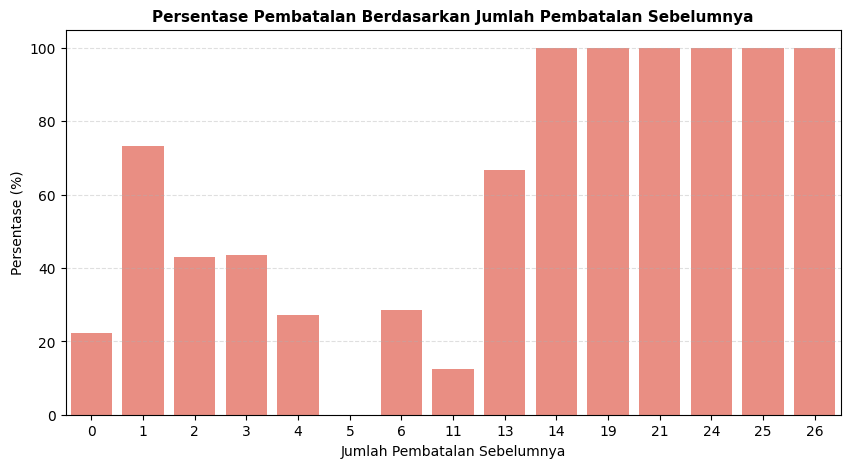

In [18]:
# Barplot persentase pembatalan berdasarkan jumlah pembatalan sebelumnya

previous_cancel_df = previous_cancel.loc[1].reset_index()
previous_cancel_df.columns = ['previous_cancellations', 'percentage']

plt.figure(figsize=(10,5))
sns.barplot(data=previous_cancel_df, x='previous_cancellations', y='percentage', color='salmon')
plt.title('Persentase Pembatalan Berdasarkan Jumlah Pembatalan Sebelumnya', size=11, weight='bold')
plt.xlabel('Jumlah Pembatalan Sebelumnya')
plt.ylabel('Persentase (%)')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

Berdasarkan tabel dan barplot di atas, terlihat bahwa semakin sering pelanggan melakukan pembatalan pada pemesanan sebelumnya maka semakin tinggi persentase pembatalan pada pemesanan saat ini. Persentase pembatalan tertinggi terjadi pada pelanggan dengan riwayat pembatalan lebih dari 13, yaitu mencapai 100%. Hal ini menunjukkan bahwa seluruh pelanggan dengan riwayat pembatalan lebih dari 13 selalu membatalkan pemesanannya pada periode saat ini.

### **Jumlah Perubahan Pemesanan**

In [27]:
# Persentase pembatalan berdasarkan jumlah perubahan pemesanan

booking_cancel = pd.crosstab(df['is_canceled'], df['booking_changes'], normalize='columns') * 100
booking_cancel.round(2)

booking_changes,0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,20,21
is_canceled,,,,,,,,,,,,,,,,,,,
0,72.25,82.25,78.86,83.11,81.28,83.75,64.71,95.45,60.0,100.0,80.0,100.0,100.0,100.0,100.0,50.0,100.0,100.0,100.0
1,27.75,17.75,21.14,16.89,18.72,16.25,35.29,4.55,40.0,0.0,20.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0


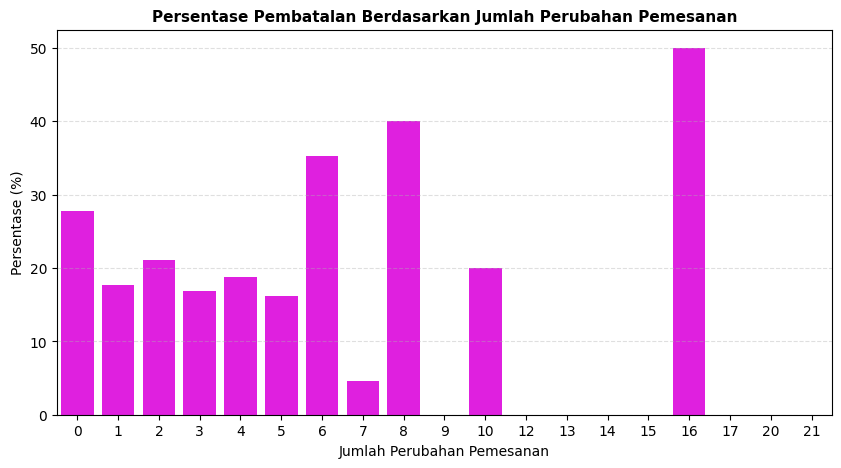

In [47]:
# Barplot persentase pembatalan berdasarkan jumlah perubahan pemesanan

booking_cancel_df = booking_cancel.loc[1].reset_index()
booking_cancel_df.columns = ['booking_changes', 'percentage']

plt.figure(figsize=(10,5))
sns.barplot(data=booking_cancel_df, x='booking_changes', y='percentage', color='magenta')
plt.title('Persentase Pembatalan Berdasarkan Jumlah Perubahan Pemesanan', size=11, weight='bold')
plt.xlabel('Jumlah Perubahan Pemesanan')
plt.ylabel('Persentase (%)')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

Berdasarkan tabel dan barplot di atas, terlihat bahwa pembatalan lebih banyak terjadi pada jumlah perubahan kurang dari 10, yang artinya semakin sedikit jumlah perubahan maka semakin besar resiko pemesanan dibatalkan. Persentase pembatalan tertinggi justru terjadi pada jumlah perubahan sebanyak 16, yaitu mencapai 50%. Namun, setelah dilakukan pengecekan kembali ternyata hanya ada 2 orang yang melakukan perubahan sebanyak 16 kali, sehingga belum bisa dikatakan bahwa 50% dari pelanggan yang melakukan perubahan pemesanan sebanyak 16 kali berpotensi melakukan pembatalan pemesanan.

### **Jumlah Permintaan Khusus**

In [25]:
# Persentase pembatalan berdasarkan jumlah permintaan khusus

request_cancel = pd.crosstab(df['is_canceled'], df['total_of_special_requests'], normalize='columns') * 100
request_cancel.round(2)

total_of_special_requests,0,1,2,3,4,5
is_canceled,,,,,,
0,72.63,78.72,78.02,80.66,85.71,100.0
1,27.37,21.28,21.98,19.34,14.29,0.0


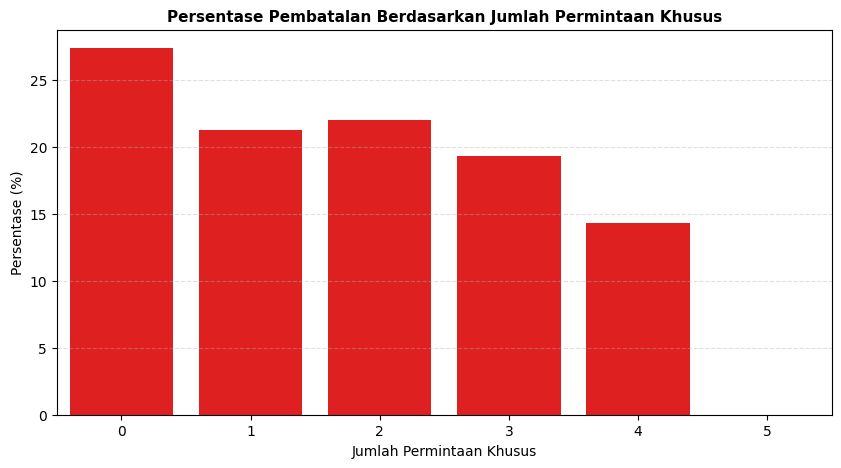

In [52]:
# Barplot persentase pembatalan berdasarkan jumlah permintaan khusus

request_cancel_df = request_cancel.loc[1].reset_index()
request_cancel_df.columns = ['total_of_special_requests', 'percentage']

plt.figure(figsize=(10,5))
sns.barplot(data=request_cancel_df, x='total_of_special_requests', y='percentage', color='red')
plt.title('Persentase Pembatalan Berdasarkan Jumlah Permintaan Khusus', size=11, weight='bold')
plt.xlabel('Jumlah Permintaan Khusus')
plt.ylabel('Persentase (%)')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

Berdasarkan tabel dan barplot di atas, terlihat bahwa semakin banyak jumlah permintaan maka persentase pembatalan cenderung rendah. Persentase pembatalan tertinggi terjadi pada pemesanan tanpa permintaan khusus, yaitu mencapai 27%.

### **Korelasi Fitur Numerik**

Text(0.5, 1.0, 'Correlation Matrix')

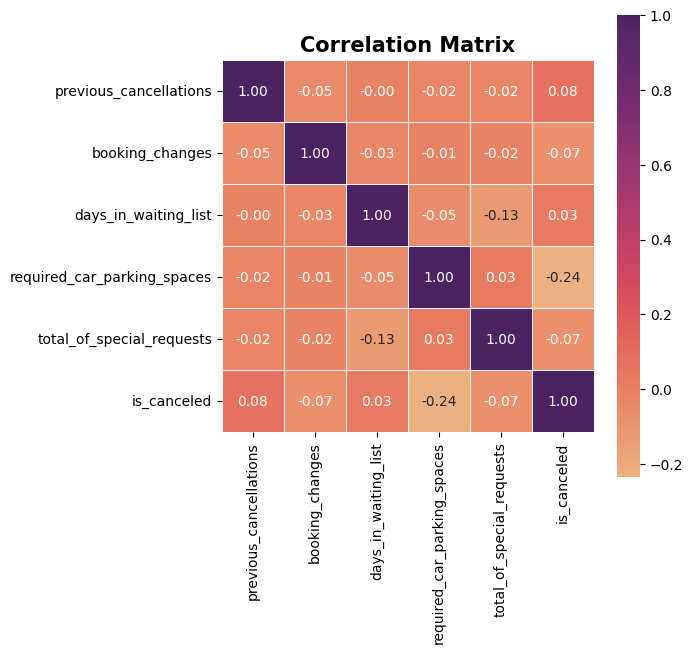

In [68]:
# Correlation matrix setiap fitur numerik

num_cols = df.select_dtypes(include=['int64']).columns

plt.figure(figsize=(6, 6))
corr = df[num_cols].corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='flare', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

Berdasarkan *correlation matrix* tersebut, terlihat bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur `is_canceled`. Korelasi paling tinggi dimiliki oleh fitur `required_car_parking_spaces` sebesar -0.24, yang berarti semakin banyak jumlah permintaan tempat parkir maka semakin kecil kemungkinan pemesanan dibatalkan.

## **Data Preparation**

In [69]:
# Melihat 5 baris data teratas

df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


### **Feature Encoding**

Sebelum melakukan pemodelan, perlu dilakukan encoding pada fitur-fitur kategorikal agar fitur-fitur tersebut dapat dimasukkan ke dalam model. Encoding yang akan dilakukan antara lain:
1. Mengubah fitur `country` menjadi bilangan biner dengan Binary Encoding, karena fitur ini memiliki nilai unik yang banyak yaitu 162 dan tidak memiliki urutan.
2. Mengubah fitur `market_segment` menjadi bilangan biner dengan Binary Encoding, karena fitur ini memiliki nilai unik yang banyak yaitu 8 dan tidak memiliki urutan.
3. Mengubah fitur `deposit_type` menjadi angka dengan One Hot Encoding, karena fitur ini memiliki nilai unik yang sedikit yaitu 3 dan tidak memiliki urutan.
4. Mengubah fitur `customer_type` menjadi angka dengan One Hot Encoding, karena fitur ini memiliki nilai unik yang sedikit yaitu 4 dan tidak memiliki urutan.
5. Mengubah fitur `reserved_room_type` menjadi bilangan biner dengan Binary Encoding, karena fitur ini memiliki nilai unik yang banyak yaitu 10 dan tidak memiliki urutan.

In [70]:
# Encoding fitur kategorik

preproces = ColumnTransformer([
    ('Binary Encoding', BinaryEncoder(), ['country', 'market_segment', 'reserved_room_type']),
    ('One Hot Encoding', OneHotEncoder(drop='first'), ['deposit_type', 'customer_type'])
], remainder='passthrough')

preproces

,transformers,"[('Binary Encoding', ...), ('One Hot Encoding', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,verbose,0
,cols,None
,mapping,None


### **Train and Test Splitting**

Selanjutnya, akan dilakukan pembagian dataset menjadi data training dan data testing dengan proporsi data training : data testing yaitu 80:20. Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk menguji performa model. Pembagian ini bertujuan untuk menghindari masalah *overfitting* dan memberikan evaluasi yang lebih realistis terhadap kemampuan model dalam memprediksi data yang belum pernah dilihat sebelumnya.

In [71]:
# Memisahkan data menjadi variabel x dan y

x = df.drop(columns='is_canceled')
y = df['is_canceled']

# Memisahkan data menjadi data training dan testing dengan proporsi 80:20

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=123, stratify=y)

## **Model Benchmarking**

Setelah melakukan proses *data cleaning* dan *data preparation*, selanjutnya yaitu membandingkan performa dari beberapa model dengan tujuan untuk mengidentifikasi model yang paling efektif, efisien, dan sesuai dengan karakteristik dari data yang digunakan. Model yang akan diuji antara lain:
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. K-Nearest Neighbors (KNN)
5. Support Vector Machine (SVM)
6. Extreme Gradient Boosting (XGBoost)
7. Light Gradient Boosting Machine (LightGBM)
8. Categorical Boosting (CatBoost)

### **Benchmark Basic Model**

In [72]:
# Define basic model

dt = DecisionTreeClassifier(random_state=123)
rf = RandomForestClassifier(random_state=123)
logreg = LogisticRegression(random_state=123)
knn = KNeighborsClassifier()
svm = SVC(random_state=123)
xgb = XGBClassifier(random_state=123)
lgbm = LGBMClassifier(random_state=123, verbose=-1)
cb = CatBoostClassifier(random_state=123, verbose=False)

In [73]:
# Menentukan model benchmarking terbaik

model = [dt, rf, logreg, knn, svm, xgb, lgbm, cb]
score = []
score_mean = []
score_std = []

for i in model:
    pipe = Pipeline([
    ('Preprocessing', preproces),
    ('Model', i)
    ])

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    cv_score = cross_val_score(pipe, xtrain, ytrain, cv=kfold, scoring='recall')

    score.append(cv_score)
    score_mean.append(round(cv_score.mean(), 3))
    score_std.append(round(cv_score.std(), 3))

recap_basic = pd.DataFrame({
    'Model' : ['Decision Tree', 'Random Forest', 'Logreg', 'KNN', 'SVM', 'XGBoost', 'LightGBM', 'CatBoost'],
    'Recall Score AVG' : score_mean,
    'Recall Score STD' : score_std
}).sort_values('Recall Score AVG', ascending=False).reset_index(drop=True)

recap_basic

,Model,Recall Score AVG,Recall Score STD
0,XGBoost,0.348,0.010
1,LightGBM,0.333,0.017
2,CatBoost,0.324,0.019
3,KNN,0.315,0.024
4,Random Forest,0.300,0.012
5,Decision Tree,0.291,0.019
6,Logreg,0.260,0.009
7,SVM,0.007,0.006


Berdasarkan tabel hasil perhitungan tersebut, terlihat bahwa model XGBoost memiliki nilai rata-rata recall paling tinggi yaitu 0.348 atau 35%. Namun, nilai rata-rata recall pada setiap model masih tergolong sangat rendah yaitu < 0.5, yang artinya semua model gagal memprediksi mayoritas data kelas positif. Hal ini mungkin disebabkan karena data yang digunakan mengalami masalah *imbalance* atau ketidakseimbangan antara kelas positif dan negatif yang menyebabkan model cenderung lebih fokus pada kelas mayoritas yaitu kelas negatif dan banyak kelas positif yang tidak terdeteksi. Oleh karena itu, akan dilakukan pembobotan (*class weighting*) pada setiap model sebagai berikut:
1. Menambahkan parameter `class_weight='balanced'` pada model Decision Tree, Random Forest, Logistic Regression, dan SVM.
2. Menambahkan parameter `scale_pos_weight` pada model XGBoost, LightGBM, dan CatBoost.

### **Benchmark Penalized Model**

In [74]:
# Menambah parameter class_weight

dt = DecisionTreeClassifier(random_state=123, class_weight='balanced')
rf = RandomForestClassifier(random_state=123, class_weight='balanced')
logreg = LogisticRegression(random_state=123, class_weight='balanced')
svm = SVC(random_state=123, class_weight='balanced')

# Menambah parameter scale_pos_weight

xgb = XGBClassifier(random_state=123, scale_pos_weight=sum(y == 0)/sum(y == 1))
lgbm = LGBMClassifier(random_state=123, verbose=-1, scale_pos_weight=sum(y == 0)/sum(y == 1))
cb = CatBoostClassifier(random_state=123, verbose=False, scale_pos_weight=sum(y == 0)/sum(y == 1))

In [75]:
# Menentukan model benchmarking terbaik

model = [dt, rf, logreg, knn, svm, xgb, lgbm, cb]
score = []
score_mean = []
score_std = []

for i in model:
    pipe = Pipeline([
    ('Preprocessing', preproces),
    ('Model', i)
    ])

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    cv_score = cross_val_score(pipe, xtrain, ytrain, cv=kfold, scoring='recall')

    score.append(cv_score)
    score_mean.append(round(cv_score.mean(), 3))
    score_std.append(round(cv_score.std(), 3))

recap_weight = pd.DataFrame({
    'Model' : ['Decision Tree', 'Random Forest', 'Logreg', 'KNN', 'SVM', 'XGBoost', 'LightGBM', 'CatBoost'],
    'Recall Score AVG' : score_mean,
    'Recall Score STD' : score_std
}).sort_values('Recall Score AVG', ascending=False).reset_index(drop=True)

recap_weight

,Model,Recall Score AVG,Recall Score STD
0,SVM,0.855,0.012
1,LightGBM,0.820,0.024
2,CatBoost,0.819,0.022
3,Logreg,0.798,0.012
4,XGBoost,0.783,0.027
5,Decision Tree,0.388,0.013
6,Random Forest,0.329,0.008
7,KNN,0.315,0.024


Setelah dilakukan pembobotan, terlihat bahwa nilai rata-rata recall pada beberapa model mangalami peningkatan yang cukup signifikan. Nilai rata-rata recall paling tinggi terdapat pada model SVM yaitu 0.855 atau 86% dan diurutan kedua terdapat pada model LightGBM yaitu 0.820 atau 82%.

### **Prediksi Data Testing dengan Benchmark Model**

Model dengan pembobotan memiliki nilai rata-rata recall lebih tinggi dibandingkan menggunakan *basic model*, sehingga akan dilakukan pengecekan performa model dengan pembobotan ke *data testing* untuk melihat apakah performa model akan tetap stabil atau tidak. Model yang akan ditesting hanya 5 model dengan performa terbaik yaitu SVM, LightGBM, CatBoost, Logistic Regression, dan XGBoost.

In [76]:
# Prediksi pada data testing

model = [logreg, svm, xgb, lgbm, cb]
rec = []

for i in model:
    pipe = Pipeline([
    ('Preprocessing', preproces),
    ('Model', i)
    ])

    pipe.fit(xtrain, ytrain)
    ypred = pipe.predict(xtest)

    recall = recall_score(ytest, ypred)
    rec.append(recall)
    
recall_test = pd.DataFrame({
    'Model' : ['Logreg', 'SVM', 'XGBoost', 'LightGBM', 'CatBoost'],
    'Recall Score' : rec
}).round(3).sort_values('Recall Score', ascending=False).reset_index(drop=True)

recall_test

,Model,Recall Score
0,SVM,0.816
1,LightGBM,0.812
2,CatBoost,0.808
3,XGBoost,0.791
4,Logreg,0.756


Setelah melakukan prediksi pada *data testing*, model SVM tetap menjadi model yang memiliki performa terbaik dengan nilai recall sebesar 0.816 atau 82%. Pada urutan kedua ditempati oleh model LightGBM dengan nilai recall sebesar 0.812 atau 81%. Oleh karena itu, akan dilakukan *hyperparameter tuning* pada kedua model tersebut yaitu SVM dan LightGBM untuk melihat manakah model terbaik dari kedua model tersebut.

## **Hyperparameter Tuning**

### **Model SVM**

Referensi untuk tuning model SVM:
1. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
2. https://www.kaggle.com/code/rajeevnair676/svm-hyperparameter-tuning
3. https://www.researchgate.net/publication/377638746_Optimisasi_Hiperparameter_Tuning_pada_Metode_Support_Vector_Machine_untuk_Klasifikasi_Tingkat_Kematangan_Buah_Kopi

Parameter yang akan dituning antara lain:
1. C = Mengontrol trade-off antara margin besar dan kesalahan klasifikasi (semakin kecil nilainya maka model semakin ketat)
2. Kernel = Fungsi untuk transformasi data
3. Gamma = Mengontrol seberapa jauh pengaruh suatu data (semakin besar nilainya maka model semakin kompleks)

#### **Hyperparameter Tuning dengan GridSearchCV**

In [77]:
# Model SVM yang akan dituning

svm = SVC(random_state=123, class_weight='balanced')

pipe_svm = Pipeline([
    ('Preprocessing', preproces),
    ('Model', svm)
])

# Parameter yang akan dituning

param_svm = [
    # Untuk kernel linear
    {
        'Model__kernel' : ['linear'],
        'Model__C' : [0.1, 1, 10, 100]
    },

    # Untuk kernel rbf
    {
        'Model__kernel' : ['rbf'],
        'Model__C' : [0.1, 1, 10, 100],
        'Model__gamma' : ['scale', 0.01, 0.1, 1]
    },

    # Untuk kernel sigmoid
    {
        'Model__kernel' : ['sigmoid'],
        'Model__C' : [0.1, 1, 10, 100],
        'Model__gamma' : ['scale', 0.01, 0.1, 1]
    }
]

# Hyperparameter tuning dengan GridSearchCV

grid_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=param_svm,
    scoring='recall',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123),
    n_jobs=-1,
    verbose=1
)

In [78]:
# Fitting ke data training

grid_svm.fit(xtrain, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,Pipeline(step..._state=123))])
,param_grid,"[{'Model__C': [0.1, 1, ...], 'Model__kernel': ['linear']}, {'Model__C': [0.1, 1, ...], 'Model__gamma': ['scale', 0.01, ...], 'Model__kernel': ['rbf']}, ...]"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('Binary Encoding', ...), ('One Hot Encoding', ...)]"


#### **Hasil Tuning Model SVM**

In [79]:
# Melihat hasil tuning dan diurutkan berdasarkan rank test score

pd.DataFrame(grid_svm.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model__C,param_Model__kernel,param_Model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,7.631188,0.415297,2.351468,0.137829,0.1,rbf,0.1,"{'Model__C': 0.1, 'Model__gamma': 0.1, 'Model_...",0.882507,0.864230,0.845953,0.863874,0.882199,0.867753,0.013631,1
17,7.516996,0.404481,1.853098,0.176189,100.0,rbf,0.01,"{'Model__C': 100, 'Model__gamma': 0.01, 'Model...",0.838120,0.859008,0.895561,0.863874,0.858639,0.863040,0.018520,2
8,7.999426,0.418323,2.714771,0.081262,1.0,rbf,scale,"{'Model__C': 1, 'Model__gamma': 'scale', 'Mode...",0.856397,0.864230,0.832898,0.853403,0.866492,0.854684,0.011914,3
16,6.962585,0.253887,2.012660,0.156464,100.0,rbf,scale,"{'Model__C': 100, 'Model__gamma': 'scale', 'Mo...",0.859008,0.869452,0.840731,0.840314,0.842932,0.850487,0.011730,4
9,6.714045,0.241928,2.315693,0.190829,1.0,rbf,0.01,"{'Model__C': 1, 'Model__gamma': 0.01, 'Model__...",0.845953,0.859008,0.825065,0.845550,0.874346,0.849984,0.016320,5


In [80]:
# Parameter dan skor terbaik hasil tuning

print(f'Best Parameter : {grid_svm.best_params_}')
print(f'Best Score Recall : {grid_svm.best_score_:.3f}')

Best Parameter : {'Model__C': 0.1, 'Model__gamma': 0.1, 'Model__kernel': 'rbf'}
Best Score Recall : 0.868


Berdasarkan hasil tuning, terlihat bahwa model SVM dengan parameter `C` = 0.1, `gamma` = 0.1, dan `kernel` = rbf merupakan kombinasi parameter dengan nilai recall terbaik sekitar 0.868 atau 87%. Kemudian, akan dilakukan pengecekan performa model ke *data testing* untuk melihat apakah performa model masih tetap bagus atau justru mengalami penurunan. 

#### **Prediksi Data Testing dengan Parameter Terbaik**

In [81]:
# Prediksi pada data testing

best_svm = grid_svm.best_estimator_

best_svm.fit(xtrain, ytrain)
y_pred = best_svm.predict(xtest)

recall_svm_tuning = recall_score(ytest, y_pred)
print(f'Nilai Recall Model SVM setelah Tuning : {recall_svm_tuning:.3f}')

Nilai Recall Model SVM setelah Tuning : 0.846


Ternyata setelah dites ke *data testing*, nilai recall model tersebut turun menjadi 0.846 atau 85%, namun penurunan tersebut tidak signifikan sehingga model tersebut masih bagus untuk digunakan sebagai model prediksi.

### **Model LightGBM**

Referensi untuk tuning model LightGBM:
1. https://lightgbm.readthedocs.io/en/stable/Parameters.html
2. https://lightgbm.readthedocs.io/en/stable/Parameters-Tuning.html

Parameter yang akan dituning antara lain:
1. num_leaves = Jumlah *leaf* maksimal pada satu pohon decision tree (semakin besar nilainya maka model yang terbentuk semakin kompleks)
2. max_depth = Kedalaman maksimum tiap pohon (semakin besar nilainya maka semakin dalam kedalaman pohon)
3. learning_rate = Besarnya langkah pembelajaran model dalam boosting (semakin besar nilainya maka semakin cepat model belajar)
4. n_estimators = Jumlah pohon yang dibuat dalam boosting
5. min_child_samples = Minimum jumlah sampel yang harus ada dalam satu *leaf* (semakin kecil nilainya, semakin berisiko terjadinya *overfitting*)

#### **Hyperparameter Tuning dengan GridSearchCV**

In [82]:
# Model LightGBM yang akan dituning

lgbm = LGBMClassifier(random_state=123, verbose=-1, scale_pos_weight=sum(y == 0)/sum(y == 1))

pipe_lgbm = Pipeline([
    ('Preprocessing', preproces),
    ('Model', lgbm)
])

# Parameter yang akan dituning

param_lgbm = {
    'Model__num_leaves' : [21, 31, 63, 127],
    'Model__max_depth' : [-1, 3, 7, 9],
    'Model__learning_rate' : [0.01, 0.05, 0.1],
    'Model__n_estimators' : [100, 300, 500, 800],
    'Model__min_child_samples' : [10, 20, 50, 100]
}

# Hyperparameter tuning dengan GridSearchCV

grid_lgbm = GridSearchCV(
    estimator=pipe_lgbm,
    param_grid=param_lgbm,
    scoring='recall',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123),
    n_jobs=-1,
    verbose=1
)

In [83]:
# Fitting data training

grid_lgbm.fit(xtrain, ytrain)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


,estimator,Pipeline(step...verbose=-1))])
,param_grid,"{'Model__learning_rate': [0.01, 0.05, ...], 'Model__max_depth': [-1, 3, ...], 'Model__min_child_samples': [10, 20, ...], 'Model__n_estimators': [100, 300, ...], ...}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('Binary Encoding', ...), ('One Hot Encoding', ...)]"


#### **Hasil Tuning Model LightGBM**

In [84]:
# Melihat hasil tuning dan diurutkan berdasarkan rank test score

pd.DataFrame(grid_lgbm.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model__learning_rate,param_Model__max_depth,param_Model__min_child_samples,param_Model__n_estimators,param_Model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
200,3.419565,0.066903,0.056350,0.001437,0.01,9,10,500,21,"{'Model__learning_rate': 0.01, 'Model__max_dep...",0.840731,0.825065,0.882507,0.861257,0.858639,0.853640,0.019491,1
8,3.774067,0.189748,0.065401,0.004220,0.01,-1,10,500,21,"{'Model__learning_rate': 0.01, 'Model__max_dep...",0.838120,0.819843,0.879896,0.861257,0.866492,0.853122,0.021421,2
256,0.819923,0.064581,0.037269,0.001337,0.05,-1,10,100,21,"{'Model__learning_rate': 0.05, 'Model__max_dep...",0.835509,0.809399,0.885117,0.861257,0.866492,0.851555,0.026375,3
448,1.185642,0.184203,0.041376,0.002303,0.05,9,10,100,21,"{'Model__learning_rate': 0.05, 'Model__max_dep...",0.840731,0.812010,0.879896,0.861257,0.858639,0.850506,0.022904,4
384,1.267263,0.047589,0.038971,0.001061,0.05,7,10,100,21,"{'Model__learning_rate': 0.05, 'Model__max_dep...",0.835509,0.825065,0.866841,0.861257,0.856021,0.848939,0.015954,5


In [85]:
# Parameter dan skor terbaik hasil tuning

print(f'Best Parameter : {grid_lgbm.best_params_}')
print(f'Best Score Recall : {grid_lgbm.best_score_:.3f}')

Best Parameter : {'Model__learning_rate': 0.01, 'Model__max_depth': 9, 'Model__min_child_samples': 10, 'Model__n_estimators': 500, 'Model__num_leaves': 21}
Best Score Recall : 0.854


Berdasarkan hasil tuning, terlihat bahwa model LightGBM dengan parameter `learning_rate` = 0.01, `max_depth` = 9, `min_child_samples` = 10, `n_estimators` = 500, dan `num_leaves` = 21 merupakan kombinasi parameter dengan nilai recall terbaik sekitar 0.854 atau 85%. Kemudian, akan dilakukan pengecekan performa model ke *data testing* untuk melihat apakah performa model masih tetap bagus atau justru mengalami penurunan. 

In [87]:
# Prediksi pada data testing

best_lgbm = grid_lgbm.best_estimator_

best_lgbm.fit(xtrain, ytrain)
y_pred = best_lgbm.predict(xtest)

recall_lgbm_tuning = recall_score(ytest, y_pred)
print(f'Nilai Recall Model LightGBM setelah Tuning : {recall_lgbm_tuning:.3f}')


Nilai Recall Model LightGBM setelah Tuning : 0.856


Setelah dilakukan prediksi ke *data testing*, nilai recall model LightGBM menjadi 0.856 atau 86%. Nilai tersebut mengalami kenaikan dibandingkan nilai recall pada *data training*, namun kenaikan tersebut tidak signifikan sehingga model tersebut masih bagus untuk digunakan.

## **Perbandingan Nilai Recall Sebelum dan Sesudah Hyperparameter Tuning**

Selanjutnya, akan dilihat perbandingan nilai recall pada *data testing* sebelum dan sesudah dilakukan *hyperparameter tuning* untuk memilih satu model terbaik yang akan dijadikan model akhir.

In [88]:
# Tabel perbandingan nilai recall sebelum dan sesudah tuning

pd.DataFrame({
    ('Model', '') : ['SVM', 'LightGBM'],
    ('Recall Score', 'Before Tuning') : [recall_test.iloc[0,1], recall_test.iloc[1,1]],
    ('Recall Score', 'After Tuning') : [recall_svm_tuning, recall_lgbm_tuning]
}).round(3).sort_values(('Recall Score', 'After Tuning'), ascending=False)

Model  Recall Score             
            Before Tuning After Tuning
1  LightGBM         0.812        0.856
0       SVM         0.816        0.846

Berdasarakan tabel tersebut terlihat bahwa setelah dilakukan *hyperparameter tuning*, kedua model mengalami kenaikan performa atau nilai recall. Model SVM mengalami kenaikan sekitar 0.03 atau 3%, sedangkan model LightGBM mengalami kenaikan sekitar 0.044 atau 4%. Model LightGBM memiliki performa yang jauh lebih bagus dibandingkan model SVM setelah dilakukan proses tuning, sehingga model LightGBM akan digunakan sebagai model akhir untuk melakukan prediksi pelanggan akan melakukan pembatalan atau tidak.

## **Feature Importances**

Kemudian, akan dilihat fitur apa saja yang paling berpengaruh terhadap pembatalan pada model LightGBM.

In [89]:
fitur_importance = pd.DataFrame({
    'Feature' : preproces.get_feature_names_out(),
    'Importance' : best_lgbm['Model'].feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True).head(10)

fitur_importance

,Feature,Importance
0,remainder__total_of_special_requests,999
1,remainder__booking_changes,856
2,remainder__previous_cancellations,838
3,Binary Encoding__country_3,661
4,Binary Encoding__market_segment_2,635
5,Binary Encoding__market_segment_1,630
6,Binary Encoding__market_segment_3,496
7,Binary Encoding__country_5,482
8,remainder__required_car_parking_spaces,481
9,Binary Encoding__country_7,444


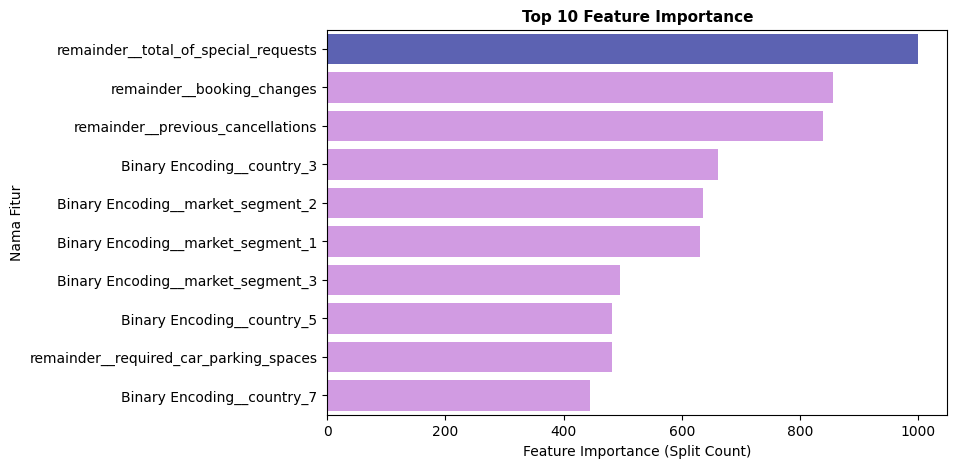

In [ ]:
# Barplot 10 fitur yang paling berpengaruh
 
bar_colors = ['#4E56C0'] + ['#D78FEE'] * 9

plt.figure(figsize=(8,5))
sns.barplot(y=fitur_importance['Feature'], x=fitur_importance['Importance'], palette=bar_colors)
plt.title('Top 10 Feature Importance', size=11, weight='bold')
plt.xlabel('Feature Importance (Split Count)')
plt.ylabel('Nama Fitur'

plt.show()

Nilai *importance* yang tinggi menunjukkan bahwa fitur atau kolom tersebut lebih sering digunakan dalam pemisahan node dan memiliki pengaruh yang lebih besar terhadap prediksi model. Terlihat bahwa pada model LightGBM yang digunakan, fitur `total_of_special_requests` memiliki pengaruh yang sangat besar terhadap prediksi potensi pembatalan dibandingkan fitur yang lain. Kemudian, fitur kedua dan ketiga yang paling berpengaruh adalah `booking_changes` dan `previous_cancellations`.

## **Business Impact**

Sekarang, akan kita hitung pengaruh sebelum dan sesudah menggunakan model *Machine Learning* secara finansial. Misalkan rata-rata pendapatan hotel per kamar di Portugal sekitar €160 (sumber : [Portugal Tourist Accomodation Prices](https://www.idealista.pt/en/news/property-for-rent-in-portugal/2025/04/21/69064-portugal-ranks-8th-for-highest-tourist-accommodation-prices-in-the-eu)) dan ada sekitar 100 pembatalan pemesanan kamar setiap bulan, maka perhitungannya sebagai berikut:

Tanpa Model:
- Total pembatalan kamar : 100
- Pendapatan per kamar : €160
- Total kerugian : 100 x €160 = €16.000

Menggunakan Model:
- Total pembatalan kamar : 100
- Total pembatalan yang berhasil diprediksi : 86% x 100 = 86
- Total pembatalan yang gagal diprediksi : 100 - 86 = 14
- Pendapatan per kamar : €160
- Total kerugian : 14 x €160 = €2.240

Berdasarkan hasil contoh perhitungan tersebut, terlihat bahwa dengan menggunakan model yang sudah dibuat, pihak hotel dapat mengurangi kerugian akibat pembatalan sebesar €13.760.

## **Kesimpulan dan Rekomendasi**

### **Kesimpulan**

Berdasarkan hasil analisis dan evaluasi model yang sudah dilakukan, diperoleh beberapa kesimpulan sebagai berikut:
1.  Hotel X menghadapi tingkat pembatalan pemesanan yang tinggi, yaitu sekitar 24%. Angka tersebut berpotesi mengganggu operasional dan pertumbuhan bisnis jangka panjang jika tidak ditangani dengan tepat.

2. Hasil EDA menunjukkan karakteristik pelanggan yang memiliki risiko tinggi melakukan pembatalan, antara lain:
   - Kelompok pelanggan Online Travel Agent : Kemudahan dalam melakukan proses pembatalan secara *online* membuat pelanggan cenderung membatalkan pemesanan jika mereka mendapatkan opsi hotel lain yang lebih sesuai.
   - Riwayat pembatalan tinggi (previous_cancellations > 13) : Pelanggan dengan riwayat pembatalan tinggi cenderung memiliki pola yang konsisten untuk membatalkan pemesanan berikutnya. Artinya, pelanggan ini tidak memiliki komitmen tinggi ketika melakukan pemesanan hotel dan harus diwaspadai.
   - Jumlah perubahan pemesanan rendah (booking_changes < 10) : Pelanggan dengan jumlah perubahan rendah cenderung memiliki rencana perjalanan yang kurang matang sehingga berpotensi melakukan pembatalan pemesanan.
   - Permintaan khusus sedikit (total_of_special_requests) : Pelanggan tanpa permintaan khusus cenderung lebih impulsif dan kurang berkomitmen pada rencana menginapnya.

3. Model Light Gradient Boosting Machine (LightGBM) memberikan performa terbaik dengan nilai Recall sebesar 0.856. Artinya, model mampu mengidentifikasi pelanggan yang berpotensi membatalkan dengan tingkat ketepatan 86%. Hal ini penting untuk membantu hotel mengambil tindakan mitigasi sedini mungkin.

4. Berdasarkan hasil *feature importance* diperoleh 3 fitur yang paling berpengaruh terhadap pembatalan, yaitu **total_of_special_requests**, **booking_changes**, dan **previous_cancellations**.

**Limitasi Model**

1. Model sangat bergantung pada kelengkapan dan kualitas data historis, sehingga fitur penting yang tidak tersedia dalam dataset dapat menurunkan akurasi prediksi. 
2. Ketidakseimbangan kelas (*imbalance data*) tetap menjadi tantangan karena dapat membuat model kurang optimal dalam mengenali pola pada kelas pembatalan.
3. Keberadaan outlier pada data berpotensi membuat model belajar pola yang tidak mewakili kondisi sebenarnya.
4. Model akan memberikan hasil prediksi yang optimal saat rentang nilai pada fitur `days_in_waiting_list` antara 0-250 hari.
5. Model hanya fokus pada peningkatan nilai Recall yang mengakibatkan Precision menurun, sehingga menghasilkan lebih banyak *false positive* yang dapat memicu tindakan pencegahan yang tidak selalu diperlukan.

### **Rekomendasi**

**Rekomendasi Bisnis**

Berdasarkan kesimpulan di atas, rekomendasi yang dapat dilakukan oleh Hotel X untuk menangani pembatalan antara lain:
1. Mengoptimalkan strategi untuk pelanggan Online Travel Agent (OTA) melalui kolaborasi atau penyesuaian kebijakan dengan mitra OTA.
   - Aksi : Meninjau ulang kebijakan pembatalan, memperketat aturan *free cancellation*, atau menawarkan harga khusus yang tidak dapat dibatalkan.
   - Impact : Memberikan keuntungan bagi tim pemasaran dalam menekan biaya komisi serta meningkatkan kualitas pelanggan OTA yang masuk.

2. Meningkatkan pengawasan dan penanganan khusus terhadap pelanggan berisiko tinggi melakukan pembatalan (*high cancellation risk*).
   - Aksi : Membuat kebijakan tambahan bagi pelanggan yang memiliki riwayat pembatalan tinggi, seperti deposit awal, aturan pembatalan yang lebih ketat, atau penawaran alternatif yang dapat mengurangi pembatalan mendadak.
   - Impact : Membantu tim operasional mengurangi potensi pembatalan mendadak, meningkatkan stabilitas okupansi, dan memudahkan perencanaan operasional harian.

3. Mengembangkan kebijakan yang meminimalkan pembatalan pada pelanggan dengan sedikit perubahan.
   - Aksi : Mengirimkan pengingat otomatis, *pre-stay engagement message*, atau melakukan konfirmasi ulang kepada pelanggan agar pelanggan lebih yakin dengan rencananya.
   - Impact : Memberikan informasi lebih akurat tentang komitmen pelanggan sehingga tim operasional dapat mengatur alokasi kamar dan staf dengan lebih efisien.

4. Memberikan promo atau opsi tambahan untuk mendorong permintaan khusus.
   - Aksi : Memberikan fitur tambahan yang memotivasi pelanggan untuk mengisi preferensi, seperti *room preference setup*, *free request options*, atau paket pemesanan yang dipersonalisasi.
   - Impact : Meningkatkan pengalaman pelanggan, mendorong loyalitas, serta mengurangi peluang pembatalan dari pelanggan baru maupun pelanggan tetap.

5. Menggunakan model prediksi LightGBM dalam proses operasional hotel.
   - Aksi : Mengimplementasikan model ke dalam dashboard pemesanan hotel.
   - Impact : Membantu manajemen dalam pengambilan keputusan berbasis data, mempercepat proses identifikasi pelanggan berisiko, dan meningkatkan efektivitas tindakan preventif tim operasional.

6. Menetapkan kebijakan untuk membatasi nilai `days_in_waiting_list` menjadi maksimal 250 hari atau kurang, untuk mengurangi jumlah *outlier* pada fitur tersebut yang berpotensi mengganggu proses analisis data dan pengembangan model prediksi.

7. Menambahkan ID pada pemesanan untuk menghindari kesalahan dalam melakukan *cleaning data* karena data dianggap sebagai duplikat. 

**Rekomendasi Model**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi antara lain:
1. Menambah beberapa fitur penting yang mendukung pembatalan, seperti alasan pembatalan, lama menginap, preferensi pelanggan, dan lain-lain.
2. Mencoba penanganan *imbalance data* dengan menggunakan metode *resampling* seperti SMOTE, *Random Over Sampling*, *Random Under Sampling*, dan *NearMiss* untuk melihat apakah prediksi terhadap pembatalan akan lebih baik dibandingkan menggunakan *class weight* tanpa menurunkan precision terlalu banyak. Kemudian, bisa juga mencoba menggunakan metode lain yang *robust* terhadap *imbalance data*.
3. Bersihkan outlier yang ekstrem atau lakukan transformasi data agar tidak mempengaruhi model secara signifikan.
4. Mencoba melakukan *hyperparameter tuning* lebih lanjut dengan menambah parameter yang dituning atau mengganti nilai paramater yang lain untuk meningkatkan performa prediksi.
5. Melakukan analisa terhadap data yang masih salah prediksi untuk melihat karakteristik dari data tersebut beserta alasan kegagalan prediksi.

## **Menyimpan Model Terbaik**

In [ ]:
# Save model

import pickle

with open('cancel.pkl', 'wb') as file:
    pickle.dump(best_lgbm, file)